<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/transfer_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf


import tensorflow_hub as hub

import datetime

%load_ext tensorboard

In [2]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

classifier_model = mobilenet_v2

In [3]:
!pip install tensorflow==2.8.0  # or another compatible version
!pip install tensorflow-hub==0.12.0


In [11]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf


import tensorflow_hub as hub

import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

#Run it on a single image
Download a single image to try the model on:



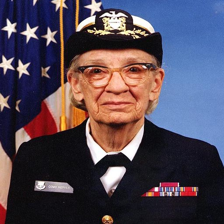

In [14]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [15]:
print(type(grace_hopper))


<class 'PIL.Image.Image'>


In [16]:
import numpy as np

# Assuming grace_hopper is a string representation of an array
grace_hopper = np.array(grace_hopper)  # Be cautious with eval


In [17]:
grace_hopper = grace_hopper/255.0
grace_hopper.shape

(224, 224, 3)

#Add a batch dimension (with np.newaxis) and pass the image to the model:



In [18]:
#the reason we are doing this , adding one more dimension to our work is because in prediction we need multiple input
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

#The result is a 1001-element vector of logits, rating the probability of each class for the image.

The top class ID can be found with tf.math.argmax:

In [19]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=653>